# IPL 2020

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
import scipy.stats as stats
from scipy.stats import ttest_1samp,ttest_ind,ttest_rel,mannwhitneyu,wilcoxon,shapiro,chisquare,chi2_contingency

# Description about Batsman table:
POS : Position

PLAYER : Name of the Player
    
Mat : Number of Matches Played
    
Inns : Inns played
    
NO : NOT OUT in number of Matches played
    
Runs : Number of Runs Scored 
    
HS : Highest Score ever made by the batsman.
    
Avg : Average runs scored throught out the ipl 2020 (670 / 14)

BF : Ball Faced (Total number of balls received, including no-balls but not including wides)
    
SR : Stike Rate ( Avg number of runs scored per 100 ball faced) High stike rate, more effective batsman
    
100 : Number of 100 scored in each match
    
50 : Number of 50 scored in each match
    
4s : Number of 4s in each match
    
6s : Number of 6s in each match

In [3]:
# Loading batsman Dataset:

In [4]:
d = pd.read_excel('batsman-stats.xlsx')
d.head()

,POS,PLAYER,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,1.0,NaN,14.0,14.0,2.0,670.0,132*,55.83,518.0,129.34,1.0,5.0,58.0,23.0
1,NaN,KLRahul,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,NaN,17.0,17.0,3.0,618.0,106*,44.14,427.0,144.73,2.0,4.0,67.0,12.0
3,NaN,Shikhar Dhawan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,NaN,16.0,16.0,2.0,548.0,85*,39.14,407.0,134.64,0.0,4.0,52.0,14.0


In [5]:
# Finding null value

In [6]:
d.isnull().sum() / len(d)

POS       0.5
PLAYER    0.5
Mat       0.5
Inns      0.5
NO        0.5
Runs      0.5
HS        0.5
Avg       0.5
BF        0.5
SR        0.5
100       0.5
50        0.5
4s        0.5
6s        0.5
dtype: float64

In [7]:
# null vlaue imputation:

In [8]:
d1 = pd.DataFrame(d['PLAYER'])
d1 = d1.dropna()
d1 = d1.reset_index(drop = True)
d1

,PLAYER
0,KLRahul
1,Shikhar Dhawan
2,David Warner
3,Shreyas Iyer
4,Ishan Kishan
...,...
95,Moeen Ali
96,Sandeep Sharma
97,Mohammad Nabi
98,Rinku Singh


In [9]:
d2 = pd.DataFrame(d.drop('PLAYER',axis = 1))
d2 = d2.dropna()
d2 = d2.reset_index(drop = True)
d2

,POS,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,1.0,14.0,14.0,2.0,670.0,132*,55.83,518.0,129.34,1.0,5.0,58.0,23.0
1,2.0,17.0,17.0,3.0,618.0,106*,44.14,427.0,144.73,2.0,4.0,67.0,12.0
2,3.0,16.0,16.0,2.0,548.0,85*,39.14,407.0,134.64,0.0,4.0,52.0,14.0
3,4.0,17.0,17.0,2.0,519.0,88*,34.6,421.0,123.27,0.0,3.0,40.0,16.0
4,5.0,14.0,13.0,4.0,516.0,99,57.33,354.0,145.76,0.0,4.0,36.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96.0,3.0,3.0,0.0,12.0,11,4,16.0,75.00,0.0,0.0,1.0,0.0
96,97.0,13.0,5.0,3.0,12.0,9,6,15.0,80.00,0.0,0.0,1.0,0.0
97,98.0,1.0,1.0,1.0,11.0,11*,-,8.0,137.50,0.0,0.0,2.0,0.0
98,99.0,1.0,1.0,0.0,11.0,11,11,11.0,100.00,0.0,0.0,1.0,0.0


In [10]:
# Merging Dataset

In [11]:
dd = pd.merge(d1,d2,left_index= True,right_index=True)
dd.head()

,PLAYER,POS,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,KLRahul,1.0,14.0,14.0,2.0,670.0,132*,55.83,518.0,129.34,1.0,5.0,58.0,23.0
1,Shikhar Dhawan,2.0,17.0,17.0,3.0,618.0,106*,44.14,427.0,144.73,2.0,4.0,67.0,12.0
2,David Warner,3.0,16.0,16.0,2.0,548.0,85*,39.14,407.0,134.64,0.0,4.0,52.0,14.0
3,Shreyas Iyer,4.0,17.0,17.0,2.0,519.0,88*,34.6,421.0,123.27,0.0,3.0,40.0,16.0
4,Ishan Kishan,5.0,14.0,13.0,4.0,516.0,99,57.33,354.0,145.76,0.0,4.0,36.0,30.0


In [12]:
# checking null value after removing null values

In [13]:
dd.isnull().sum()

PLAYER    0
POS       0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Avg       0
BF        0
SR        0
100       0
50        0
4s        0
6s        0
dtype: int64

In [14]:
# Finding datatypes

In [15]:
dd.dtypes

PLAYER     object
POS       float64
Mat       float64
Inns      float64
NO        float64
Runs      float64
HS         object
Avg        object
BF        float64
SR        float64
100       float64
50        float64
4s        float64
6s        float64
dtype: object

In [16]:
dd['a'] = dd['HS'].str.slice(-1).replace({'*':'NOT_OUT',np.NaN:'OUT'})
dd['a']

0     NOT_OUT
1     NOT_OUT
2     NOT_OUT
3     NOT_OUT
4         OUT
       ...   
95        OUT
96        OUT
97    NOT_OUT
98        OUT
99        OUT
Name: a, Length: 100, dtype: object

In [17]:
dd.insert(loc = 7,column = 'HS_3',value = dd['a'].to_list())

In [18]:
dd.drop('a',axis = 1,inplace = True)

In [19]:
dd['Avg'].unique()

array([55.83, 44.14, 39.14, 34.6, 57.33, 35.92, 40, 31.53, 42.36, 45.4,
       40.81, 33.84, 32.69, 38.54, 41.8, 28.84, 39.88, 35.3, 25.14, 31.36,
       31.18, 27.66, 32.8, 45.28, 25.91, 29.9, 41.14, 40.71, 35.12, 22.33,
       53.6, 42.5, 46.4, 23, 17.53, 71.33, 51, 25, 16.33, 23.25, 23.12,
       14.08, 20.85, 14.77, 21.66, 18.42, 13.44, 13, 14.62, 18.83, 14.12,
       18.5, 22.2, 18.16, 15.42, 20.6, 101, 24.25, 12.28, 83, 19.5, '-',
       14.2, 33, 20.66, 19.66, 14, 42, 13.33, 9.25, 12.33, 8.75, 8.5,
       16.5, 10.66, 16, 9.66, 27, 7.33, 21, 10.5, 9.5, 9, 17, 8, 7.5, 5,
       15, 12, 4, 6, 11], dtype=object)

In [20]:
dd['Avg1'] = dd['Avg'].replace({'-':np.nan})

In [21]:
dd['Avg1'] = dd['Avg1'].fillna(dd['Runs']/dd['Mat']).astype(float)

In [22]:
dd['Avg1'].unique()

array([ 55.83      ,  44.14      ,  39.14      ,  34.6       ,
        57.33      ,  35.92      ,  40.        ,  31.53      ,
        42.36      ,  45.4       ,  40.81      ,  33.84      ,
        32.69      ,  38.54      ,  41.8       ,  28.84      ,
        39.88      ,  35.3       ,  25.14      ,  31.36      ,
        31.18      ,  27.66      ,  32.8       ,  45.28      ,
        25.91      ,  29.9       ,  41.14      ,  40.71      ,
        35.12      ,  22.33      ,  53.6       ,  42.5       ,
        46.4       ,  23.        ,  17.53      ,  71.33      ,
        51.        ,  25.        ,  16.33      ,  23.25      ,
        23.12      ,  14.08      ,  20.85      ,  14.77      ,
        21.66      ,  18.42      ,  13.44      ,  13.        ,
        14.62      ,  18.83      ,  14.12      ,  18.5       ,
        22.2       ,  18.16      ,  15.42      ,  20.6       ,
       101.        ,  24.25      ,  12.28      ,  83.        ,
        19.5       ,   8.875     ,  14.2       ,  33.  

In [23]:
dd.drop('Avg',axis=1,inplace = True)

In [24]:
for i in dd['HS'].index:
    for j in str(dd.loc[i,'HS']):
        if '*' in j:
            dd.loc[i,'HS'] = dd.loc[i,'HS'].replace('*','')
        else:
            dd.loc[i,'HS'] = dd.loc[i,'HS']

In [25]:
dd['HS'] = dd['HS'].astype(int)

In [26]:
dd.dtypes

PLAYER     object
POS       float64
Mat       float64
Inns      float64
NO        float64
Runs      float64
HS          int32
HS_3       object
BF        float64
SR        float64
100       float64
50        float64
4s        float64
6s        float64
Avg1      float64
dtype: object

In [27]:
dd.head()

,PLAYER,POS,Mat,Inns,NO,Runs,HS,HS_3,BF,SR,100,50,4s,6s,Avg1
0,KLRahul,1.0,14.0,14.0,2.0,670.0,132,NOT_OUT,518.0,129.34,1.0,5.0,58.0,23.0,55.83
1,Shikhar Dhawan,2.0,17.0,17.0,3.0,618.0,106,NOT_OUT,427.0,144.73,2.0,4.0,67.0,12.0,44.14
2,David Warner,3.0,16.0,16.0,2.0,548.0,85,NOT_OUT,407.0,134.64,0.0,4.0,52.0,14.0,39.14
3,Shreyas Iyer,4.0,17.0,17.0,2.0,519.0,88,NOT_OUT,421.0,123.27,0.0,3.0,40.0,16.0,34.60
4,Ishan Kishan,5.0,14.0,13.0,4.0,516.0,99,OUT,354.0,145.76,0.0,4.0,36.0,30.0,57.33


Q1 : Does the Stike Rate having effect on High Score in IPL 2020?

In [28]:
# Hypothesis:
# H0 : Stike Rate has no effect on High Score
# Ha : Stike Rate has effect on High Score

In [29]:
# Grouping:
g1 = dd['SR']
g2 = dd['HS']

In [30]:
# Test for Normality:
print('Test of noramlity for G1 is :',shapiro(g1))
print('Test of Normality for G2 is :',shapiro(g2))

Test of noramlity for G1 is : ShapiroResult(statistic=0.989804208278656, pvalue=0.6487743854522705)
Test of Normality for G2 is : ShapiroResult(statistic=0.933882474899292, pvalue=8.322851499542594e-05)


In [31]:
# From the above shapiro test we can conclude that pvalue of g1 > 0.05 and g2 is < 0.05. 
# among two groups if anyone pvalue > 0.05 ,then data is said to be normal. Proceeding with ttest.

In [32]:
# Mean Test:
ttest_ind(g1,g2)

Ttest_indResult(statistic=19.272079574252327, pvalue=2.6744452146059855e-47)

In [33]:
# Pvalue < 0.05. Null Hypothesis holds good. Therefore we can conclude that, Stike rate has effect on High Score

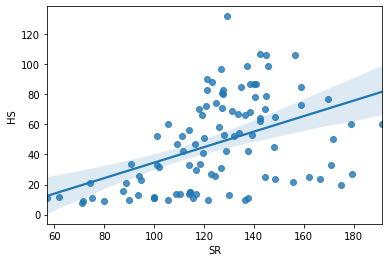

In [34]:
# Posthoc analysis:
# To analyse the relationship between stike rate and high score, bivariant analysis is used.

sns.regplot(dd['SR'],dd['HS'])
plt.show()

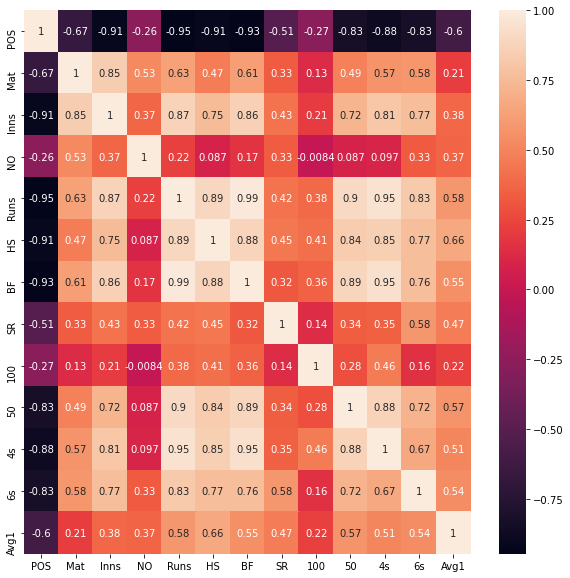

In [35]:
plt.figure(figsize = (10,10))
sns.heatmap(dd.corr(),annot = True)
plt.show()

In [36]:
# From the above heatmap and regplot we can conclude that, we have slight positive correlation between Stike rate and High score

Q2 : Is there any effect on Ball faced and Highest score in IPL 2020?

In [37]:
# Hypothesis:
# H0: Ball Face has no effect on High score
# Ha: Ball Face has effect on High Score

In [38]:
g1 = dd['BF']
g2 = dd['HS']

In [39]:
# Test of normality:
print(shapiro(g1))
print(shapiro(g2))

# both pvalue < 0.05. Data is skewed.

ShapiroResult(statistic=0.8805328607559204, pvalue=1.9117227623155486e-07)
ShapiroResult(statistic=0.933882474899292, pvalue=8.322851499542594e-05)


In [40]:
# Mean test:
mannwhitneyu(g1,g2)

MannwhitneyuResult(statistic=2798.5, pvalue=3.754859349945478e-08)

In [41]:
# Inference: 
# From the above mean test we can conclude that Ha holds good. Ballfaced has effect on High score, because p < 0.05

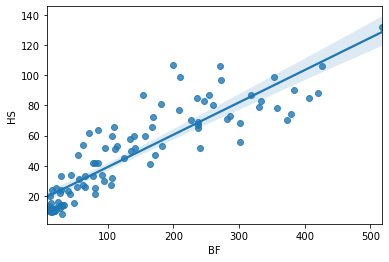

In [42]:
# Posthoc analysis:
sns.regplot(dd['BF'],dd['HS'])
plt.show()

In [43]:
# From the above regplot we can conclude that, Ball Faced and High Score has relationship with each other

Q3 : Does High score has effect on Average run scored in IPL 2020?

In [44]:
# Hypothesis:
# H0 : High Score has no effect on Average run scored
# Ha : High Score has effect on Average run scored

In [45]:
g1 = dd['HS']
g2 = dd['Avg1']

In [46]:
# Test for Normality:
print(shapiro(g1))
print(shapiro(g2))

# both the pvalues < 0.05. Data is skewed.

ShapiroResult(statistic=0.933882474899292, pvalue=8.322851499542594e-05)
ShapiroResult(statistic=0.8744983673095703, pvalue=1.0693437246800386e-07)


In [47]:
# Mean Test:
mannwhitneyu(g1,g2)

MannwhitneyuResult(statistic=2886.0, pvalue=1.205390907459524e-07)

In [48]:
# Inference:
# From the above mean test, we can conclude that High Score has effect on Average run scored, because P < 0.05.
# From the below heatmap we can conclude that Highscore and Average has strong correlation with each other.

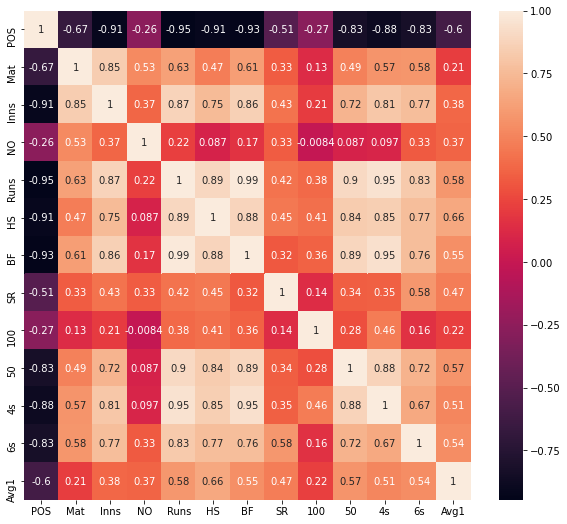

In [49]:
# Posthoc analysis:
plt.figure(figsize = (10,9))
sns.heatmap(dd.corr(),annot = True)
plt.show()

Q4 : Mean of Average Runs scored by Batsman in IPL 2020 is equal to 50

In [50]:
# Hypothesis:
# H0 : Mean of Average Run scored by batsman = 50
# Ha : Mean of Average Run scored by batsman != 50

In [51]:
# Test of Normality:
print(shapiro(dd['Avg1']))

# in the above mean test, p < 0.05. Data is skewed.

ShapiroResult(statistic=0.8744983673095703, pvalue=1.0693437246800386e-07)


In [52]:
# Mean Test:
wilcoxon(dd['Avg1'] - 50)

WilcoxonResult(statistic=210.0, pvalue=1.7236067172312026e-15)

In [53]:
# Inference:

# since p < 0.05 in the above mean test, Ha hold good. Therefore mean of average run scored by batsman in IPL 2020 is not equal 50.

In [54]:
# Posthoc analysis:
dd.Avg1.mean()

# mean of avgerage run scored by batsman in IPL 2020 is 25.34

25.340183333333314

Q5 : In IPL 2020, Mean Stike Rate of players is 110.

In [55]:
# Hypothesis:
# H0 : Mean Stike Rate of the player = 110
# Ha : Mean Stike Rate of the player != 110

In [56]:
# Test of Normality:
print(shapiro(dd['SR']))

# P > 0.05. Data is normal.

ShapiroResult(statistic=0.989804208278656, pvalue=0.6487743854522705)


In [138]:
# Mean Test:
ttest_1samp(dd['SR'],110)

# Inference:
# pvalue < 0.05, therefore Ha holds good. Mean Stike Rate of the player is not equal to 110.

Ttest_1sampResult(statistic=5.640342495982817, pvalue=1.6113729234039527e-07)

In [58]:
# Posthoc analysis:
dd['SR'].mean()

# Therfore mean Stike Rate of the player in IPL 2020 is approximately 125

124.92330000000005

Q6 : Is High score has effect on batsman out and Not-out in IPL 2020?

In [ ]:
# Hypothesis:
# H0 : Batsman Out High Score = Batsman Not-out High Score
# Ha : Batsman Out High Score != Batsman Not-out High Score

In [140]:
g1 = dd[dd['HS_3']=='OUT']['HS']
g2 = dd[dd['HS_3']=='NOT_OUT']['HS']

In [141]:
# Test of Normality:
print(shapiro(g1))
print(shapiro(g2))

# pvalue of g1 and g2 < 0.05. Therefore data is skewed.

ShapiroResult(statistic=0.9420680999755859, pvalue=0.012438731268048286)
ShapiroResult(statistic=0.9102458953857422, pvalue=0.0015545140486210585)


In [142]:
# Mean Test:
mannwhitneyu(g1,g2)

MannwhitneyuResult(statistic=1227.5, pvalue=0.4518877632297305)

In [ ]:
# Inference:

# p value > 0.05. Therefore null hypothesis holds good. 
# we can conclude that, Batsman Out High Score is equal to Batsman Not-Out High Score.

Q7 : Does Batsman Run has effect on Stike rate in IPL 2020? 

In [ ]:
# Hypothesis:
# H0 : Run has no effect on Stike Rate
# Ha : Run has effect on Stike Rate

In [145]:
g1 = dd['Runs']
g2 = dd['SR']

In [146]:
# Test of Normality:
print(shapiro(g1))
print(shapiro(g2))

# p value > 0.05. Therefore Data is normal

ShapiroResult(statistic=0.874904453754425, pvalue=1.1113918674254819e-07)
ShapiroResult(statistic=0.989804208278656, pvalue=0.6487743854522705)


In [147]:
# Mean Test:
ttest_ind(g1,g2)

Ttest_indResult(statistic=3.421486713883457, pvalue=0.0007565067976513197)

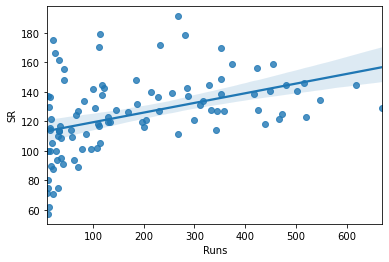

In [148]:
# Inference: pvalue > 0.05. Therefore Ha holds good. Batsman Run has effect on Stike Rate in IPL 2020

# Posthoc analysis:

sns.regplot(dd['Runs'],dd['SR'])
plt.show()

# From the below plot, we can conclude that, Runs and SR has effect with each other.

# Description about Bowler Dataset

PLAYER : Name of the Player

Mat: no.of matches
    
Inns : no.of matches

Runs: Runs given in overall IPL

Ov : Overs bowled

Wkts : Total number of wickets

BBI : Best Bowling Inning (maximum wickets with lowest run)
  
Avg : Number of runs they have conceded per wicket taken. Lower the bowling average, better bowler performing

Econ : Avg number of runs they have conceded per over bowled. Lower economy rate, better bowler performing.

SR : Avg number of balls bowled per wicket taken. Lower strike rate, effective bowler taking wickets quickly

4W : 4 wickets in each match

5W : 5 wicktes in each match

In [59]:
# Loading Bowler Dataset:

In [60]:
d1 = pd.read_excel('bowler-stats.xlsx')
d1.head()

,POS,PLAYER,Mat,Inns,Ov,Runs,Wkts,BBI,Avg,Econ,SR,4w,5w
0,1.0,NaN,17.0,17.0,65.4,548.0,30.0,4/24,18.26,8.34,13.13,2.0,0.0
1,NaN,Kagiso Rabada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,NaN,15.0,15.0,60.0,404.0,27.0,4/14,14.96,6.73,13.33,2.0,0.0
3,NaN,Jasprit Bumrah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,NaN,15.0,15.0,57.2,457.0,25.0,4/18,18.28,7.97,13.76,1.0,0.0


In [61]:
# Computing null values:

In [62]:
d1.isnull().sum()

POS       98
PLAYER    98
Mat       98
Inns      98
Ov        98
Runs      98
Wkts      98
BBI       98
Avg       98
Econ      98
SR        98
4w        98
5w        98
dtype: int64

In [63]:
# null value imputation:

In [64]:
d11 = pd.DataFrame(d1['PLAYER'])
d11 = d11.dropna()
d11 = d11.reset_index(drop = True)
d11

,PLAYER
0,Kagiso Rabada
1,Jasprit Bumrah
2,Trent Boult
3,Anrich Nortje
4,Yuzvendra Chahal
...,...
93,Varun Aaron
94,Umesh Yadav
95,Kane Williamson
96,David Warner


In [65]:
d12 = pd.DataFrame(d1.drop('PLAYER',axis = 1))
d12 = d12.dropna()
d12 = d12.reset_index(drop = True)
d12

,POS,Mat,Inns,Ov,Runs,Wkts,BBI,Avg,Econ,SR,4w,5w
0,1.0,17.0,17.0,65.4,548.0,30.0,4/24,18.26,8.34,13.13,2.0,0.0
1,2.0,15.0,15.0,60.0,404.0,27.0,4/14,14.96,6.73,13.33,2.0,0.0
2,3.0,15.0,15.0,57.2,457.0,25.0,4/18,18.28,7.97,13.76,1.0,0.0
3,4.0,16.0,16.0,61.0,512.0,22.0,3/33,23.27,8.39,16.63,0.0,0.0
4,5.0,15.0,15.0,57.1,405.0,21.0,3/18,19.28,7.08,16.33,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
93,94.0,3.0,3.0,8.0,94.0,0.0,0/22,-,11.75,-,0.0,0.0
94,95.0,2.0,2.0,7.0,83.0,0.0,0/35,-,11.85,-,0.0,0.0
95,96.0,12.0,1.0,2.0,24.0,0.0,0/24,-,12.00,-,0.0,0.0
96,97.0,16.0,1.0,0.1,2.0,0.0,0/2,-,12.00,-,0.0,0.0


In [66]:
# Merging two dataframe:
f_d1 = pd.merge(d11,d12,left_index = True, right_index = True)
f_d1.head()

,PLAYER,POS,Mat,Inns,Ov,Runs,Wkts,BBI,Avg,Econ,SR,4w,5w
0,Kagiso Rabada,1.0,17.0,17.0,65.4,548.0,30.0,4/24,18.26,8.34,13.13,2.0,0.0
1,Jasprit Bumrah,2.0,15.0,15.0,60.0,404.0,27.0,4/14,14.96,6.73,13.33,2.0,0.0
2,Trent Boult,3.0,15.0,15.0,57.2,457.0,25.0,4/18,18.28,7.97,13.76,1.0,0.0
3,Anrich Nortje,4.0,16.0,16.0,61.0,512.0,22.0,3/33,23.27,8.39,16.63,0.0,0.0
4,Yuzvendra Chahal,5.0,15.0,15.0,57.1,405.0,21.0,3/18,19.28,7.08,16.33,0.0,0.0


In [67]:
# To check with value counts:
for i in f_d1.columns:
    print(f_d1[i].value_counts(normalize = True))

Glenn Maxwell       0.010204
Murugan Ashwin      0.010204
Deepak Chahar       0.010204
Harshal Patel       0.010204
Sheldon Cottrell    0.010204
                      ...   
Jason Holder        0.010204
Monu Kumar          0.010204
Prasidh Krishna     0.010204
Arshdeep Singh      0.010204
Shreyas Gopal       0.010204
Name: PLAYER, Length: 98, dtype: float64
98.0    0.010204
25.0    0.010204
27.0    0.010204
28.0    0.010204
29.0    0.010204
          ...   
68.0    0.010204
69.0    0.010204
70.0    0.010204
71.0    0.010204
1.0     0.010204
Name: POS, Length: 98, dtype: float64
1.0     0.132653
14.0    0.102041
3.0     0.091837
7.0     0.091837
15.0    0.071429
5.0     0.071429
2.0     0.061224
16.0    0.061224
10.0    0.061224
9.0     0.051020
8.0     0.040816
6.0     0.040816
13.0    0.040816
12.0    0.030612
4.0     0.020408
17.0    0.020408
11.0    0.010204
Name: Mat, dtype: float64
1.0     0.173469
3.0     0.102041
2.0     0.081633
5.0     0.081633
7.0     0.081633
14.0    0.07142

In [68]:
f_d1.dtypes

PLAYER     object
POS       float64
Mat       float64
Inns      float64
Ov        float64
Runs      float64
Wkts      float64
BBI        object
Avg        object
Econ      float64
SR         object
4w        float64
5w        float64
dtype: object

In [69]:
f_d1['5w'].unique()

array([0., 1.])

In [70]:
f_d1['4w'].unique()

array([2., 1., 0.])

In [71]:
f_d1['SR'].unique() # '-' impute

array([13.13, 13.33, 13.76, 16.63, 16.33, 19.2, 16.7, 16.1, 18.35, 23.56,
       21.2, 22.28, 12, 23.53, 19.38, 13.69, 25.5, 26, 17.27, 14.81,
       19.36, 27.6, 18.9, 19.4, 30, 34, 17.33, 16.55, 25.44, 21, 10.66,
       37.5, 19.25, 21.75, 19.83, 50.16, 45.66, 36.33, 20, 18, 31.2, 45.6,
       26.4, 22.8, 19.75, 13.5, 31.5, 26.25, 34.5, 28.33, 42, 33, 45, 51,
       60, 66, 72, 48, 24, 70, '-'], dtype=object)

In [72]:
f_d1['SR'] = f_d1['SR'].replace({'-':np.nan})

In [73]:
f_d1['SR'].unique()

array([13.13, 13.33, 13.76, 16.63, 16.33, 19.2 , 16.7 , 16.1 , 18.35,
       23.56, 21.2 , 22.28, 12.  , 23.53, 19.38, 13.69, 25.5 , 26.  ,
       17.27, 14.81, 19.36, 27.6 , 18.9 , 19.4 , 30.  , 34.  , 17.33,
       16.55, 25.44, 21.  , 10.66, 37.5 , 19.25, 21.75, 19.83, 50.16,
       45.66, 36.33, 20.  , 18.  , 31.2 , 45.6 , 26.4 , 22.8 , 19.75,
       13.5 , 31.5 , 26.25, 34.5 , 28.33, 42.  , 33.  , 45.  , 51.  ,
       60.  , 66.  , 72.  , 48.  , 24.  , 70.  ,   nan])

In [74]:
# For 20 person wikcet is zero. if we are imputing null values it will be infinity. 

# so just replace it with zero.
f_d1['SR'] = f_d1['SR'].replace({np.nan : 0})
f_d1['SR']

0     13.13
1     13.33
2     13.76
3     16.63
4     16.33
      ...  
93     0.00
94     0.00
95     0.00
96     0.00
97     0.00
Name: SR, Length: 98, dtype: float64

In [75]:
f_d1['Econ'].unique()

array([ 8.34,  6.73,  7.97,  8.39,  7.08,  5.37,  6.55,  8.57,  6.84,
        8.02,  8.16,  7.19,  8.32,  7.66,  8.19,  9.53,  7.37,  7.61,
        7.86,  6.63,  8.68,  9.01,  7.46,  8.5 ,  8.54,  6.41,  8.15,
        8.77,  9.61,  9.65, 10.43,  5.96,  9.42,  9.72,  7.57,  8.29,
        8.75,  8.8 ,  9.09,  7.92,  7.94,  8.09,  8.88,  6.22,  8.11,
        9.04,  9.37,  9.91,  6.98,  7.2 ,  8.04,  8.93, 11.29, 11.44,
        7.33,  8.36,  9.1 ,  9.86, 10.26, 11.7 , 16.  ,  6.14,  6.4 ,
        6.9 ,  8.4 , 10.5 , 11.25, 11.4 , 11.5 , 12.5 , 13.71,  5.75,
        6.  ,  8.47,  8.66,  9.  ,  9.5 , 10.  , 10.25, 10.37, 11.33,
       11.75, 11.85, 12.  , 13.5 ])

In [76]:
f_d1['Avg'].unique()  # '-' impute

array([18.26, 14.96, 18.28, 23.27, 19.28, 17.2, 18.25, 23, 20.94, 31.5,
       28.86, 26.71, 16.64, 30.07, 26.46, 21.76, 31.33, 33, 34.08, 19.09,
       21.45, 29.09, 32.6, 23.5, 27.5, 42.7, 36.33, 23.55, 24.22, 40.77,
       33.77, 18.55, 37.25, 30.25, 35.25, 24.66, 63.33, 63.16, 30, 53,
       29.33, 31.83, 29.16, 41.2, 60.4, 35.6, 46.2, 20.5, 47.5, 41, 57,
       24, 56.33, 44.66, 64, 69.33, 22, 26.5, 46, 45.5, 74, 77, 99.5, 32,
       43, 76, 92, 42, 84, 45, 133, 50, 96, '-'], dtype=object)

In [77]:
f_d1['Avg'] = f_d1['Avg'].replace({'-': np.nan})
f_d1['Avg'].unique()

array([ 18.26,  14.96,  18.28,  23.27,  19.28,  17.2 ,  18.25,  23.  ,
        20.94,  31.5 ,  28.86,  26.71,  16.64,  30.07,  26.46,  21.76,
        31.33,  33.  ,  34.08,  19.09,  21.45,  29.09,  32.6 ,  23.5 ,
        27.5 ,  42.7 ,  36.33,  23.55,  24.22,  40.77,  33.77,  18.55,
        37.25,  30.25,  35.25,  24.66,  63.33,  63.16,  30.  ,  53.  ,
        29.33,  31.83,  29.16,  41.2 ,  60.4 ,  35.6 ,  46.2 ,  20.5 ,
        47.5 ,  41.  ,  57.  ,  24.  ,  56.33,  44.66,  64.  ,  69.33,
        22.  ,  26.5 ,  46.  ,  45.5 ,  74.  ,  77.  ,  99.5 ,  32.  ,
        43.  ,  76.  ,  92.  ,  42.  ,  84.  ,  45.  , 133.  ,  50.  ,
        96.  ,    nan])

In [78]:
# to fillna in avg column:
f_d1['Avg'] = f_d1['Avg'].fillna(f_d1['Runs']/f_d1['Wkts']).astype(float)
f_d1['Avg'].unique()

array([ 18.26,  14.96,  18.28,  23.27,  19.28,  17.2 ,  18.25,  23.  ,
        20.94,  31.5 ,  28.86,  26.71,  16.64,  30.07,  26.46,  21.76,
        31.33,  33.  ,  34.08,  19.09,  21.45,  29.09,  32.6 ,  23.5 ,
        27.5 ,  42.7 ,  36.33,  23.55,  24.22,  40.77,  33.77,  18.55,
        37.25,  30.25,  35.25,  24.66,  63.33,  63.16,  30.  ,  53.  ,
        29.33,  31.83,  29.16,  41.2 ,  60.4 ,  35.6 ,  46.2 ,  20.5 ,
        47.5 ,  41.  ,  57.  ,  24.  ,  56.33,  44.66,  64.  ,  69.33,
        22.  ,  26.5 ,  46.  ,  45.5 ,  74.  ,  77.  ,  99.5 ,  32.  ,
        43.  ,  76.  ,  92.  ,  42.  ,  84.  ,  45.  , 133.  ,  50.  ,
        96.  ,    inf])

In [79]:
f_d1['Avg'] = f_d1['Avg'].replace({np.inf:0})
f_d1['Avg'].unique()

# For 20 person wikcet is zero. if we are imputing null values it will be infinity. 

# so just replace it with zero.

array([ 18.26,  14.96,  18.28,  23.27,  19.28,  17.2 ,  18.25,  23.  ,
        20.94,  31.5 ,  28.86,  26.71,  16.64,  30.07,  26.46,  21.76,
        31.33,  33.  ,  34.08,  19.09,  21.45,  29.09,  32.6 ,  23.5 ,
        27.5 ,  42.7 ,  36.33,  23.55,  24.22,  40.77,  33.77,  18.55,
        37.25,  30.25,  35.25,  24.66,  63.33,  63.16,  30.  ,  53.  ,
        29.33,  31.83,  29.16,  41.2 ,  60.4 ,  35.6 ,  46.2 ,  20.5 ,
        47.5 ,  41.  ,  57.  ,  24.  ,  56.33,  44.66,  64.  ,  69.33,
        22.  ,  26.5 ,  46.  ,  45.5 ,  74.  ,  77.  ,  99.5 ,  32.  ,
        43.  ,  76.  ,  92.  ,  42.  ,  84.  ,  45.  , 133.  ,  50.  ,
        96.  ,   0.  ])

In [80]:
f_d1['BBI'].unique()

array(['4/24', '4/14', '4/18 ', '3/33 ', '3/18', '3/7', '3/19', '3/15',
       '5/20', '2/24 ', '2/18', '3/34', '3/25 ', '3/29 ', '3/19 ', '3/26',
       '2/18 ', '4/34', '4/26', '3/8', '2/19 ', '3/25', '3/21 ', '2/28',
       '2/28 ', '2/15', '3/23', '2/36', '3/17 ', '3/38', '2/16', '2/24',
       '2/41', '2/26', '2/25', '3/37', '2/42', '2/17 ', '2/33', '2/29 ',
       '2/19', '2/13 ', '1/11 ', '1/5', '3/29', '2/32', '2/35', '1/10',
       '2/34', '2/37 ', '1/37', '1/23', '1/12', '1/15 ', '1/17', '2/32 ',
       '1/39', '2/64 ', '1/25 ', '1/19', '1/24', '1/20 ', '1/21', '1/45',
       '1/45 ', '1/33', '1/46', '1/50', '1/41 ', '0/23', '0/5', '0/22',
       '0/24', '0/26', '0/6', '0/9', '0/14', '0/30', '0/20', '0/41',
       '0/39', '0/42', '0/34', '0/7', '0/35', '0/2', '0/13'], dtype=object)

In [81]:
val = f_d1['BBI'].str.split('/')

lst = []
for i in val:
    lst.append(int(i[0])/int(i[1]))
    
f_d1['BBI'] = lst

In [82]:
f_d1['Wkts'].unique()

array([30., 27., 25., 22., 21., 20., 17., 16., 15., 14., 13., 12., 11.,
       10.,  9.,  8.,  6.,  5.,  4.,  3.,  2.,  1.,  0.])

In [83]:
f_d1['Runs'] = f_d1['Runs'].astype(int)

In [84]:
f_d1['Ov'].unique()

array([65.4, 60. , 57.2, 61. , 57.1, 64. , 55.4, 53.4, 52. , 62.5, 53. ,
       28. , 51. , 42. , 29.4, 31.4, 27.1, 35.3, 46. , 31.3, 32.2, 50. ,
       26. , 24.5, 38.1, 16. , 25.4, 29. , 19.5, 50.1, 45.4, 21. , 36.2,
       20. , 18. , 38. , 22. , 19. , 13.1,  9. , 17.3, 23. , 14.1, 10. ,
       15. , 17. , 18.1,  6. ,  7. , 11. ,  4. , 12. ,  5. ,  8. , 11.4,
        0.5,  3. ,  2.5,  0.4,  1. ,  2. ,  0.1])

In [85]:
f_d1['Inns'].unique()

array([17., 15., 16., 14., 13.,  7.,  9., 10.,  8.,  4.,  5.,  6., 11.,
        3.,  2.,  1.])

In [86]:
f_d1['Mat'].unique()

array([17., 15., 16., 14., 13.,  7.,  9., 10.,  8.,  4.,  5.,  6., 11.,
        3.,  2.,  1., 12.])

In [87]:
f_d1['POS'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65.,
       66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77., 78.,
       79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90., 91.,
       92., 93., 94., 95., 96., 97., 98.])

In [88]:
f_d1['PLAYER'].unique()

array(['Kagiso Rabada', 'Jasprit\xa0Bumrah', 'Trent\xa0Boult',
       'Anrich\xa0Nortje', 'Yuzvendra\xa0Chahal', 'Rashid\xa0Khan',
       'Jofra\xa0Archer', 'Mohammad\xa0Shami', 'Varun\xa0Chakravarthy',
       'T\xa0Natarajan', 'Rahul\xa0Chahar', 'Sandeep\xa0Sharma',
       'Jason\xa0Holder', 'Ravichandran\xa0Ashwin', 'Sam\xa0Curran',
       'Marcus\xa0Stoinis', 'Ravi\xa0Bishnoi', 'Deepak\xa0Chahar',
       'Pat\xa0Cummins', 'Chris\xa0Morris', 'Mohammed\xa0Siraj',
       'James\xa0Pattinson', 'Rahul\xa0Tewatia', 'Murugan\xa0Ashwin',
       'Shardul\xa0Thakur', 'Shreyas\xa0Gopal', 'Axar\xa0Patel',
       'Shivam\xa0Mavi', 'Arshdeep\xa0Singh', 'Kartik\xa0Tyagi',
       'Chris\xa0Jordan', 'Lungi\xa0Ngidi', 'Washington\xa0Sundar',
       'Khaleel\xa0Ahmed', 'Isuru\xa0Udana', 'Lockie\xa0Ferguson',
       'Krunal\xa0Pandya', 'Navdeep\xa0Saini', 'Dwayne\xa0Bravo',
       'Ravindra\xa0Jadeja', 'Sheldon\xa0Cottrell', 'Piyush\xa0Chawla',
       'Andre\xa0Russell', 'Nathan\xa0Coulter-Nile', 'Suni

In [89]:
f_d1['PLAYER'] = f_d1['PLAYER'].replace('\xa0',' ')

In [90]:
f_d1.dtypes

PLAYER     object
POS       float64
Mat       float64
Inns      float64
Ov        float64
Runs        int32
Wkts      float64
BBI       float64
Avg       float64
Econ      float64
SR        float64
4w        float64
5w        float64
dtype: object

In [91]:
f_d1.head()

,PLAYER,POS,Mat,Inns,Ov,Runs,Wkts,BBI,Avg,Econ,SR,4w,5w
0,Kagiso Rabada,1.0,17.0,17.0,65.4,548,30.0,0.166667,18.26,8.34,13.13,2.0,0.0
1,Jasprit Bumrah,2.0,15.0,15.0,60.0,404,27.0,0.285714,14.96,6.73,13.33,2.0,0.0
2,Trent Boult,3.0,15.0,15.0,57.2,457,25.0,0.222222,18.28,7.97,13.76,1.0,0.0
3,Anrich Nortje,4.0,16.0,16.0,61.0,512,22.0,0.090909,23.27,8.39,16.63,0.0,0.0
4,Yuzvendra Chahal,5.0,15.0,15.0,57.1,405,21.0,0.166667,19.28,7.08,16.33,0.0,0.0


Q1 : Does Stike Rate has effect on Economy of Bowler in IPL 2020.

In [ ]:
# Hypothesis:
# H0 : Stike Rate has no effect on Economy Rate
# Ha : Stike Rate has effect on Economy Rate

In [149]:
g1 = f_d1['Econ']
g2 = f_d1['SR']

In [150]:
# Test of Normality:
print(shapiro(g1))
print(shapiro(g2))

# both p value < 0.05. Data is skewed

ShapiroResult(statistic=0.9545033574104309, pvalue=0.0018937678541988134)
ShapiroResult(statistic=0.927972137928009, pvalue=4.55102272098884e-05)


In [151]:
# Mean Test:
mannwhitneyu(g1,g2)

MannwhitneyuResult(statistic=1998.5, pvalue=8.141577999411782e-13)

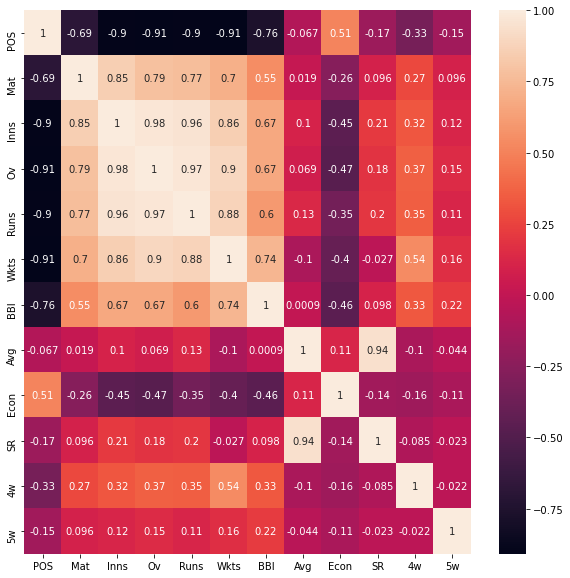

In [152]:
# Inference:
# Stike Rate has effect on Economy of Bowler in IPL 2020.

# Posthoc analysis:
plt.figure(figsize = (10,10))
sns.heatmap(f_d1.corr(),annot = True)
plt.show()

# There is a slight negative correlation exist between Economy and Stike Rate of Bowler.

Q2 :  Does Stike Rate has effect on Average of Bowler in IPL 2020.

In [ ]:
# Hypothesis:
# H0 : Stike Rate has no effect on Average of Bowler
# Ha : Stike Rate has effect on Average of Bowler

In [153]:
g1 = f_d1['SR']
g2 = f_d1['Avg']

In [154]:
# Test of Normality:
print(shapiro(g1))
print(shapiro(g2))

# p value < 0.05. Data is skewed

ShapiroResult(statistic=0.927972137928009, pvalue=4.55102272098884e-05)
ShapiroResult(statistic=0.9094977974891663, pvalue=4.95103176945122e-06)


In [155]:
# Mean Test:
mannwhitneyu(g1,g2)

MannwhitneyuResult(statistic=3618.0, pvalue=0.0013794067855936033)

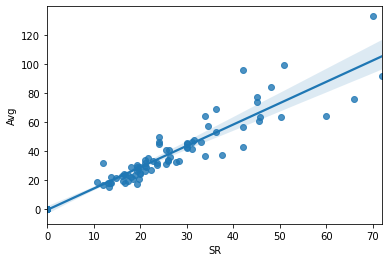

In [156]:
# Inference: 
# p value < 0.05. Therefore Ha holds good. Stike Rate has effect on Average of Bowler in IPL 2020.

# Posthoc analysis:

sns.regplot(f_d1['SR'],f_d1['Avg'])
plt.show()

# From the below plot we can conclude that there is linear relation ship exist between Economy and Stike Rate of the bowler in IPL 2020

Q3 : Does BBI has effect on Stike Rate of Bowler in IPL 2020.

In [ ]:
# Hypothesis:
# H0 : BBI has no effect on Stike Rate Bowler
# Ha : BBI has effect on Stike Rate of Bowler

In [157]:
g1 = f_d1['BBI']
g2 = f_d1['SR']

In [158]:
# Test of Normality:
print(shapiro(g1))
print(shapiro(g2))

# P value < 0.05. Data is skewed

ShapiroResult(statistic=0.8514345288276672, pvalue=1.7180736833211085e-08)
ShapiroResult(statistic=0.927972137928009, pvalue=4.55102272098884e-05)


In [159]:
# Mean Test:
mannwhitneyu(g1,g2)

MannwhitneyuResult(statistic=1760.0, pvalue=7.197249262456106e-15)

In [163]:
# Inference:
# Pvalue < 0.05. Ha holds good. Therefore we can conclude that BBI has effect on Stike Rate of Bowler in IPL 2020.

Q4 : Average Stike Rate for Bowler in IPL 2020 is greater than 13.

In [ ]:
# Hypothesis:
# H0 : Mean Stike Rate of Bowlers in IPL 2020 <= 13
# Ha : Mean Stike Rate of Bowlers in IPL 2020 > 13

In [164]:
# Test of Normality:
print(shapiro(f_d1['SR']))

# p value < 0.05. Data is skewed.

ShapiroResult(statistic=0.927972137928009, pvalue=4.55102272098884e-05)


In [165]:
# mean test:
wilcoxon(f_d1['SR'] - 13)

WilcoxonResult(statistic=1132.0, pvalue=4.429756916802601e-06)

In [166]:
# Inference:
# in the above meant test, p value > 0.05. Therefore Ha holds good. Mean Stike Rate of Bolwer in IPL 2020 is > 13

# posthoc analysis:

f_d1['SR'].mean()

# Mean Stike Rate of Bowler in IPL 2020 is approximately equals to 22.

22.14112244897959

Q5 : Average Economy of Bowler in IPL 2020 is greater than 8.

In [ ]:
# Hypothesis:
# H0 : Mean Economy of Bowler in IPl 2020 <= 8
# Ha : Mean Economy of Bowler in IPL 2020 > 8

In [167]:
# Test of Normality:
shapiro(f_d1['Econ'])

# p value < 0.05. Data is skewed

ShapiroResult(statistic=0.9545033574104309, pvalue=0.0018937678541988134)

In [168]:
# Mean Test:
wilcoxon(f_d1['Econ'] - 8)

WilcoxonResult(statistic=1314.5, pvalue=8.251385266692474e-05)

In [169]:
# Inference:
# From the above mean test we can infer that p value < 0.05. we can conclude that Mean Economy of Bowler > 8

# posthoc analysis:
f_d1['Econ'].mean()

# Average Economy of Bolwer for IPL 2020 is approximately equals to 9

8.88122448979592

Q6 : Does bowler wickets has effect on BBI in IPL 2020.

In [ ]:
# Hypothesis:
# H0 : Bowler Wicket has no effect on BBI in IPL 2020
# Ha : Bowler Wicket has effect on BBI in IPL 2020

In [170]:
g1 = f_d1['Wkts']
g2 = f_d1['BBI']

In [171]:
# Test of Normality:
print(shapiro(g1))
print(shapiro(g2))

# p value < 0.05. Data is skewed

ShapiroResult(statistic=0.847612202167511, pvalue=1.2453898357023263e-08)
ShapiroResult(statistic=0.8514345288276672, pvalue=1.7180736833211085e-08)


In [172]:
# Mean Test:
mannwhitneyu(g1,g2)

MannwhitneyuResult(statistic=1760.0, pvalue=7.111956080627356e-15)

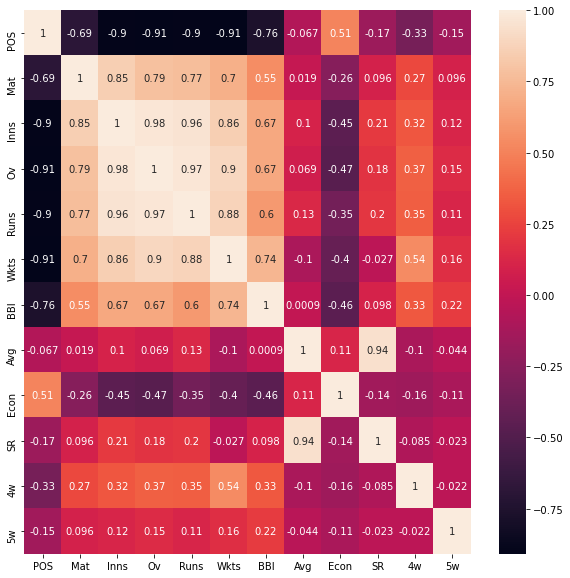

In [173]:
# Inference: pvalue < 0.05. Ha holds good. Therefore Bowler wicket has effect on BBI in IPL 2020.

# posthoc analysis:
plt.figure(figsize = (10,10))
sns.heatmap(f_d1.corr(),annot = True)
plt.show()

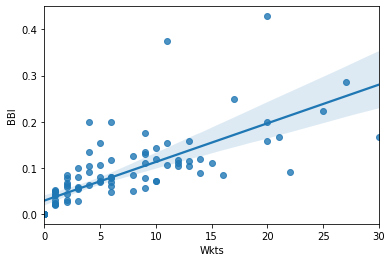

In [174]:
sns.regplot(f_d1['Wkts'],f_d1['BBI'])
plt.show()

In [ ]:
# From the above two plots we can conclude that Wickets and BBI has a strong relationship with each other in IPL 2020.